In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv(r'C:\Users\singh\anaconda3\Techstack\Case Study\Heart Disease\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# checking null values

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Exploration

In [15]:
df.slope.unique()

array([0, 2, 1], dtype=int64)

In [16]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

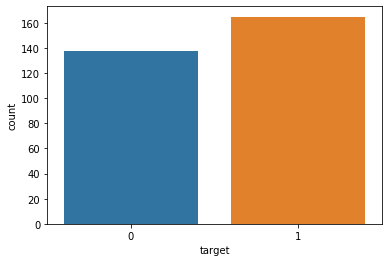

In [17]:
sns.countplot(df['target'],data=df)

In [18]:
print("% of people not having heart attack: ",(len(df[df.target==0])/len(df.target))*100)
print("% of people having heart attack: ",(len(df[df.target==1])/len(df.target))*100)

% of people not having heart attack:  45.54455445544555
% of people having heart attack:  54.45544554455446


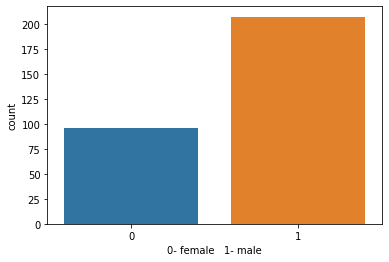

In [19]:
# now checking no. of males and females
sns.countplot(df['sex'],data=df)
plt.xlabel("0- female   1- male")
plt.show()

In [20]:
print("% of male are:",(len(df[df.sex==1])/len(df.sex))*100," and % of females are:",(len(df[df.sex==0])/(len(df.sex)))*100)

% of male are: 68.31683168316832  and % of females are: 31.683168316831683


In [21]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [226]:
print("females having hert attack are:",len(df[(df['target']==1) & (df['sex']==0)]),"out of",len(df[df.sex==0]))
print("males having heart attack are:",len(df[(df['target']==1) & (df['sex']==1)]),"out of",len(df[df.sex==1]))

females having hert attack are: 72 out of 96
males having heart attack are: 93 out of 207


Text(0, 0.5, 'Frequency')

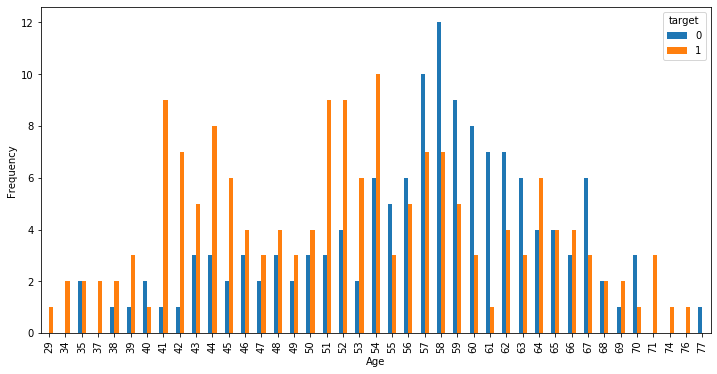

In [22]:
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(12,6))
plt.xlabel('Age')
plt.ylabel('Frequency')

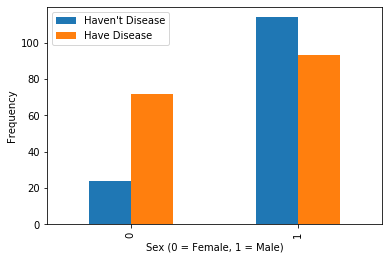

In [23]:
pd.crosstab(df.sex,df.target).plot(kind='bar')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

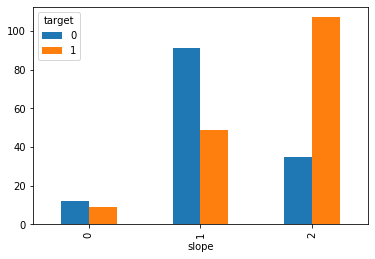

In [229]:
pd.crosstab(df.slope,df.target).plot(kind='bar')

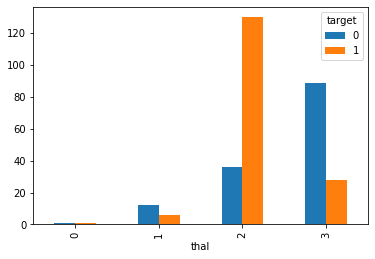

In [24]:
pd.crosstab(df.thal,df.target).plot(kind='bar')

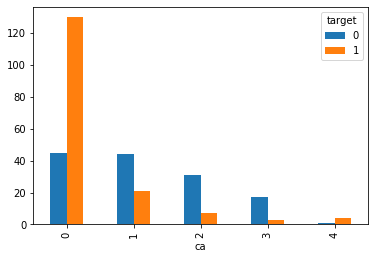

In [25]:
pd.crosstab(df.ca,df.target).plot(kind='bar')

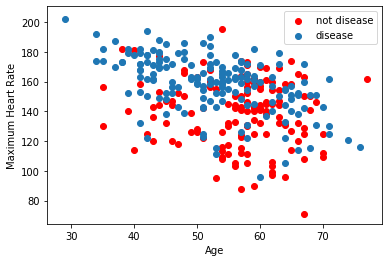

In [26]:
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='red')
plt.scatter(df.age[df.target==1],df.thalach[df.target==1])
plt.legend(["not disease","disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Text(0, 0.5, 'Frequency of Disease or Not')

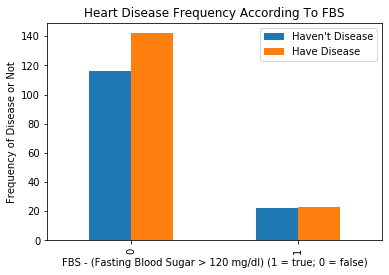

In [27]:
pd.crosstab(df.fbs,df.target).plot(kind='bar')
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')

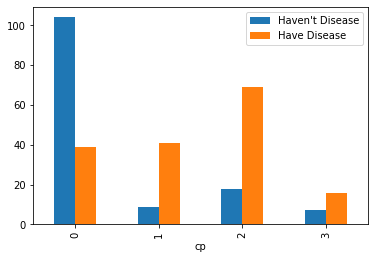

In [28]:
pd.crosstab(df.cp,df.target).plot(kind='bar')
plt.legend(["Haven't Disease", "Have Disease"])

In [42]:
x = df.drop(['target'],axis=1)

In [43]:
y = df['target']
acc = {}

In [44]:
a = pd.get_dummies(df['thal'],drop_first=True)
b = pd.get_dummies(df['cp'],drop_first=True)
c = pd.get_dummies(df['slope'],drop_first=True)

In [45]:
x = pd.concat([x,a,b,c],axis=1)

In [46]:
x = x.drop(['cp','thal','slope'],axis=1)

## using Logistic Regression model

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [48]:
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.871900826446281
0.8360655737704918


C:\Users\singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Normalizing the data

In [49]:

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_std = std.fit_transform(x)

## Again testing with Logistic Regression

In [50]:
lr = LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.2,random_state=0)
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))
acc['Logistic'] = (lr.score(x_test,y_test))*100

0.8677685950413223
0.8524590163934426


## after normalizing the data test score has increased to some level
## Now trying with KNN Model

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.8677685950413223
0.8524590163934426


## checking for different n_neighbors

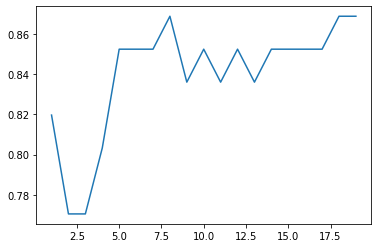

In [55]:
score = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    s = knn.score(x_test,y_test)
    score.append(s)
plt.plot(range(1,20),score)

In [56]:
acc['KNN'] = max(score)*100
acc

{'Logistic': 85.24590163934425, 'KNN': 86.88524590163934}

## looks like KNN is giving better accuracy than Logistic 

## now checing with SVM model

In [57]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(x_train,y_train)
print(svm.score(x_train,y_train))
print(svm.score(x_test,y_test))
acc['SVM'] = (svm.score(x_test,y_test))*100
acc

0.9008264462809917
0.8688524590163934


{'Logistic': 85.24590163934425,
 'KNN': 86.88524590163934,
 'SVM': 86.88524590163934}

In [58]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(x_train,y_train)
print(nb.score(x_train,y_train))
print(nb.score(x_test,y_test))
acc['Naive Bayes'] = (nb.score(x_test,y_test))*100
acc

0.8264462809917356
0.8852459016393442


{'Logistic': 85.24590163934425,
 'KNN': 86.88524590163934,
 'SVM': 86.88524590163934,
 'Naive Bayes': 88.52459016393442}

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))
acc['Decision Tree'] = (dt.score(x_test,y_test))*100
acc

1.0
0.7377049180327869


{'Logistic': 85.24590163934425,
 'KNN': 86.88524590163934,
 'SVM': 86.88524590163934,
 'Naive Bayes': 88.52459016393442,
 'Decision Tree': 73.77049180327869}

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,random_state=1)

rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))
acc['Random Forest'] = (rf.score(x_test,y_test))*100
acc

1.0
0.8524590163934426


{'Logistic': 85.24590163934425,
 'KNN': 86.88524590163934,
 'SVM': 86.88524590163934,
 'Naive Bayes': 88.52459016393442,
 'Decision Tree': 73.77049180327869,
 'Random Forest': 85.24590163934425}

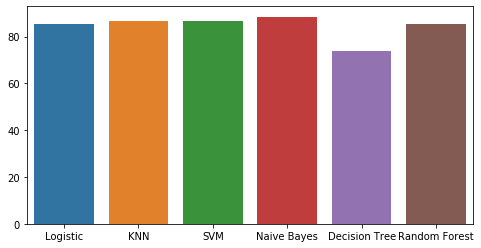

In [64]:
plt.figure(figsize=(8,4))
sns.barplot(x=list(acc.keys()),y=list(acc.values()))

In [65]:
lr_p = lr.predict(x_test)
knn_p = lr.predict(x_test)
svm_p = svm.predict(x_test)
nb_p = nb.predict(x_test)
dt_p = dt.predict(x_test)
rf_p = rf.predict(x_test)

## obtaining confusion matrix from all of the above models

In [66]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,lr_p)
cm_knn = confusion_matrix(y_test,knn_p)
cm_svm = confusion_matrix(y_test,svm_p)
cm_nb = confusion_matrix(y_test,nb_p)
cm_dt = confusion_matrix(y_test,dt_p)
cm_rf = confusion_matrix(y_test,rf_p)

## plotting the confusion matrix using heatmap

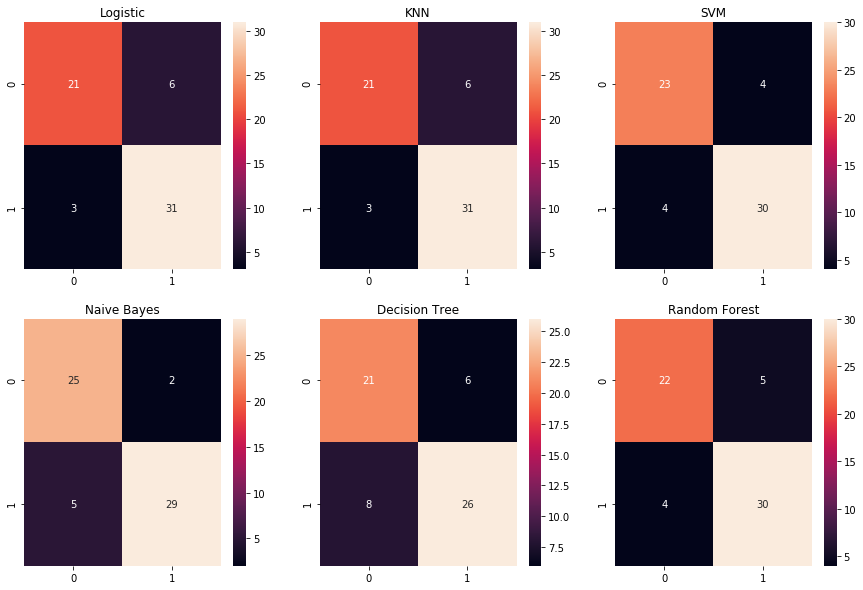

In [272]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title('Logistic')
sns.heatmap(cm_lr,annot=True)
plt.subplot(2,3,2)
plt.title('KNN')
sns.heatmap(cm_knn,annot=True)
plt.subplot(2,3,3)
plt.title('SVM')
sns.heatmap(cm_svm,annot=True)
plt.subplot(2,3,4)
plt.title('Naive Bayes')
sns.heatmap(cm_nb,annot=True)
plt.subplot(2,3,5)
plt.title('Decision Tree')
sns.heatmap(cm_dt,annot=True)
plt.subplot(2,3,6)
plt.title('Random Forest')
sns.heatmap(cm_rf,annot=True)
